# Priprema za kolokvijuma

In [1]:
import numpy as np
import random
import lavirint
from lavirint import Lavirint
from lavirint import LavirintEditor
from lavirint import LavirintAnimacija

## Zadatak 1
Napraviti algoritam koji lavirint pretražuje posmatrajući svih 8 suseda trenutnog stanja.


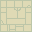
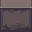
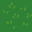
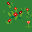
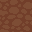
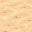
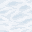
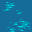
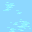
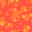
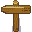
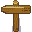
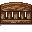
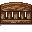
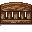
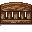
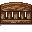
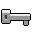
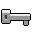
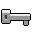
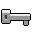
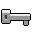
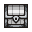
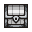
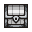
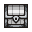
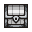
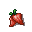
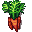

In [2]:
class Stanje:
    def __init__(self, prethodno, polje, x, y, cena=1):
        self.prethodno = prethodno
        self.polje = polje
        self.x = x
        self.y = y
        self.cena = cena
    
    def to_dict(self, rekurzivno=False):
        stanje = {
            "polje": self.polje,
            "x": self.x,
            "y": self.y,
            "prethodno": None,
            "cena": self.cena
        }
        if rekurzivno and self.prethodno is not None:
            stanje["prethodno"] = self.prethodno.to_dict(rekurzivno)
        elif self.prethodno is not None:
            stanje["prethodno"] = {"x": self.prethodno.x, "y": self.prethodno.y, "cena": self.prethodno.cena}
        return stanje
    
    def __eq__(self, other):
        return hash(self) == hash(other)
    
    def __repr__(self):
        return "{} {} {} {} {}".format(self.x, self.y, self.polje["podloga"], self.polje["objekat"], self.cena)
    
    def __hash__(self):
        p1x = -1
        p1y = -1
        if self.prethodno is not None:
            p1x = self.prethodno.x
            p1y = self.prethodno.y
        return hash((self.x, self.y, p1x, p1y))

neprohodne_podloge = {"zid"}
recnik_cena = {
    "lava": 50,
    "led": 10,
    "pod": 1
}

def cena(lavirint, x, y):
    return recnik_cena.get(lavirint.dobavi_polje(x, y)["podloga"], 1)

def sledeca_stanja(stanje, lavirint):
    nova_stanja = []
    if stanje.x+1 < lavirint.sirina and lavirint.dobavi_polje(stanje.x+1, stanje.y)["podloga"] not in neprohodne_podloge:
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x+1, stanje.y), stanje.x+1, stanje.y, cena(lavirint, stanje.x+1, stanje.y)))
    if stanje.x-1 >= 0 and lavirint.dobavi_polje(stanje.x-1, stanje.y)["podloga"] not in neprohodne_podloge:
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x-1, stanje.y), stanje.x-1, stanje.y, cena(lavirint, stanje.x-1, stanje.y)))
    if stanje.y+1 < lavirint.visina and lavirint.dobavi_polje(stanje.x, stanje.y+1)["podloga"] not in neprohodne_podloge:
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x, stanje.y+1), stanje.x, stanje.y+1, cena(lavirint, stanje.x, stanje.y+1)))
    if stanje.y-1 >= 0 and lavirint.dobavi_polje(stanje.x, stanje.y-1)["podloga"] not in neprohodne_podloge:
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x, stanje.y-1), stanje.x, stanje.y-1, cena(lavirint, stanje.x, stanje.y-1)))
        
    if stanje.x+1 < lavirint.sirina and stanje.y-1 >= 0 and lavirint.dobavi_polje(stanje.x+1, stanje.y-1)["podloga"] not in neprohodne_podloge:
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x+1, stanje.y-1), stanje.x+1, stanje.y-1, cena(lavirint, stanje.x+1, stanje.y-1)))
    if stanje.x-1 >= 0 and stanje.y-1 >= 0 and lavirint.dobavi_polje(stanje.x-1, stanje.y-1)["podloga"] not in neprohodne_podloge:
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x-1, stanje.y-1), stanje.x-1, stanje.y-1, cena(lavirint, stanje.x-1, stanje.y-1)))
    if stanje.x+1 < lavirint.sirina and stanje.y+1 < lavirint.visina and lavirint.dobavi_polje(stanje.x+1, stanje.y+1)["podloga"] not in neprohodne_podloge:
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x+1, stanje.y+1), stanje.x+1, stanje.y+1, cena(lavirint, stanje.x+1, stanje.y+1)))
    if stanje.x-1 >=0 and stanje.y+1 and lavirint.dobavi_polje(stanje.x-1, stanje.y+1)["podloga"] not in neprohodne_podloge:
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x-1, stanje.y+1), stanje.x-1, stanje.y+1, cena(lavirint, stanje.x-1, stanje.y+1)))
    return nova_stanja

def ucs(lavirint, pocetno_stanje, cilj):
    za_pretragu = [pocetno_stanje]
    poseceni = set()
    poseceni_lista = list()
    while len(za_pretragu) > 0:
        za_pretragu = sorted(za_pretragu, key=lambda x: x.cena)
        trenutno = za_pretragu.pop(0)
        poseceni.add(trenutno)
        poseceni_lista.append(trenutno)
        if trenutno.polje["objekat"] == cilj:
            return (trenutno, poseceni_lista)
        for stanje in sledeca_stanja(trenutno, lavirint):
            stanje.cena += trenutno.cena
            if stanje not in poseceni and stanje not in za_pretragu:
                za_pretragu.append(stanje)
    return (None, poseceni_lista)


lavirint = Lavirint("lavirinti/lavirint_6.json")

pocetno = random.choice(lavirint.dobavi_sa_objektom("pocetak"))
pocetno_stanje = Stanje(None, lavirint.dobavi_polje(*pocetno), *pocetno)

rezultat = ucs(lavirint, pocetno_stanje, "cilj")

animacija = LavirintAnimacija("slike", "lavirinti/lavirint_6.json", rezultat)
animacija.prikazi()

## Zadatak 2
Napraviti algoritam koji prvo pronalazi jedan ključ a potom pronalazi izlaz iz lavirinta.


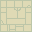
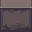
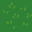
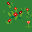
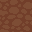
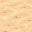
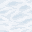
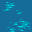
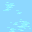
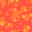
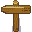
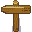
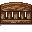
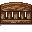
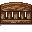
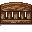
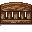
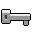
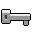
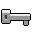
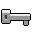
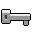
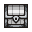
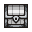
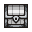
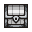
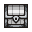
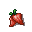
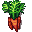

In [3]:
def sledeca_stanja(stanje, lavirint):
    nova_stanja = []
    if stanje.x+1 < lavirint.sirina and lavirint.dobavi_polje(stanje.x+1, stanje.y)["podloga"] not in neprohodne_podloge:
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x+1, stanje.y), stanje.x+1, stanje.y, cena(lavirint, stanje.x+1, stanje.y)))
    if stanje.x-1 >= 0 and lavirint.dobavi_polje(stanje.x-1, stanje.y)["podloga"] not in neprohodne_podloge:
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x-1, stanje.y), stanje.x-1, stanje.y, cena(lavirint, stanje.x-1, stanje.y)))
    if stanje.y+1 < lavirint.visina and lavirint.dobavi_polje(stanje.x, stanje.y+1)["podloga"] not in neprohodne_podloge:
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x, stanje.y+1), stanje.x, stanje.y+1, cena(lavirint, stanje.x, stanje.y+1)))
    if stanje.y-1 >= 0 and lavirint.dobavi_polje(stanje.x, stanje.y-1)["podloga"] not in neprohodne_podloge:
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x, stanje.y-1), stanje.x, stanje.y-1, cena(lavirint, stanje.x, stanje.y-1)))
    return nova_stanja

lavirint = Lavirint("lavirinti/lavirint_6.json")

pocetno = random.choice(lavirint.dobavi_sa_objektom("pocetak"))
pocetno_stanje = Stanje(None, lavirint.dobavi_polje(*pocetno), *pocetno)

rezultat = ucs(lavirint, pocetno_stanje, "kljuc")
rezultat2 = ucs(lavirint, rezultat[0], "cilj")
rezultat = (rezultat2[0], rezultat[1] + rezultat2[1])

animacija = LavirintAnimacija("slike", "lavirinti/lavirint_6.json", rezultat)
animacija.prikazi()

## Zadatak 3
Napraviti algoritam koji prvo pronalazi dva plava i jedan crveni ključ a potom pronalazi izlaz iz lavirinta.


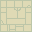
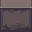
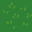
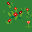
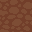
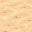
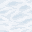
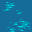
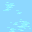
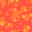
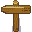
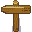
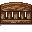
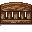
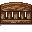
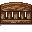
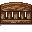
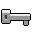
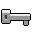
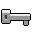
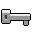
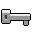
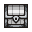
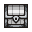
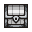
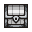
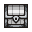
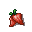
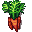

In [4]:
def ucs_kljucevi(lavirint, pocetno_stanje):
    pokupljeni_kljucevi = []
    spisak_ciljeva = {"kljuc_crveni": 1, "kljuc_plavi": 2}
    
    za_pretragu = [pocetno_stanje]
    poseceni = set()
    poseceni_lista = list()
    while len(za_pretragu) > 0:
        za_pretragu = sorted(za_pretragu, key=lambda x: x.cena)
        trenutno = za_pretragu.pop(0)
        poseceni.add(trenutno)
        poseceni_lista.append(trenutno)
        if spisak_ciljeva["kljuc_crveni"] != 0 or spisak_ciljeva["kljuc_plavi"] != 0:
            if trenutno.polje["objekat"] in spisak_ciljeva:
                if spisak_ciljeva[trenutno.polje["objekat"]] > 0:
                    neposecen = True
                    for pk in pokupljeni_kljucevi:
                        if pk.polje["objekat"] == trenutno.polje["objekat"] and pk.x == trenutno.x and pk.y == trenutno.y:
                            neposecen = False
                    if neposecen:
                        pokupljeni_kljucevi.append(trenutno)
                        spisak_ciljeva[trenutno.polje["objekat"]] -= 1
                        poseceni = set()
                        za_pretragu = []
        else:
             if trenutno.polje["objekat"] == "cilj":
                return (trenutno, poseceni_lista)
        for stanje in sledeca_stanja(trenutno, lavirint):
            stanje.cena += trenutno.cena
            if stanje not in poseceni and stanje not in za_pretragu:
                za_pretragu.append(stanje)
    return (None, poseceni_lista)

lavirint = Lavirint("lavirinti/lavirint_6.json")

pocetno = random.choice(lavirint.dobavi_sa_objektom("pocetak"))
pocetno_stanje = Stanje(None, lavirint.dobavi_polje(*pocetno), *pocetno)

rezultat = ucs_kljucevi(lavirint, pocetno_stanje)

animacija = LavirintAnimacija("slike", "lavirinti/lavirint_6.json", rezultat)
animacija.prikazi()

## Zadatak 3 - drugo rešenje
Sakupljeni ključevi se pamte u stanjima.


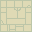
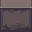
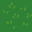
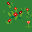
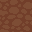
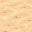
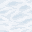
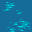
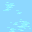
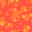
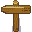
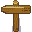
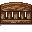
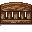
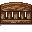
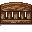
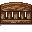
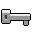
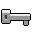
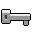
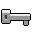
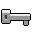
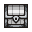
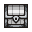
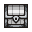
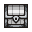
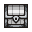
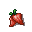
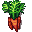

In [5]:
class Stanje:
    def __init__(self, prethodno, polje, x, y, kljucevi, cena=1):
        self.prethodno = prethodno
        self.polje = polje
        self.x = x
        self.y = y
        self.cena = cena
        self.kljucevi = kljucevi
        
    def ima_sve_kljuceve(self, trazeni_kljucevi):
        pronadjeni = {}
        for k in self.kljucevi:
            if pronadjeni.get(k.polje["objekat"]) is None:
                pronadjeni[k.polje["objekat"]] = 0
            pronadjeni[k.polje["objekat"]] += 1
        sadrzi_sve = True
        for tk in trazeni_kljucevi:
            if trazeni_kljucevi[tk] != pronadjeni.get(tk, 0):
                sadrzi_sve = False
        return sadrzi_sve
    
    def sadrzi_kljuc(self, kljuc):
        return (kljuc.x, kljuc.y) in list(map(lambda x: (x.x, x.y), self.kljucevi))
    
    def dodaj_kljuc(self, kljuc):
        if not self.sadrzi_kljuc(kljuc):
            self.kljucevi.append(kljuc)
    
    def to_dict(self, rekurzivno=False):
        stanje = {
            "polje": self.polje,
            "x": self.x,
            "y": self.y,
            "prethodno": None,
            "cena": self.cena
        }
        if rekurzivno and self.prethodno is not None:
            stanje["prethodno"] = self.prethodno.to_dict(rekurzivno)
        elif self.prethodno is not None:
            stanje["prethodno"] = {"x": self.prethodno.x, "y": self.prethodno.y, "cena": self.prethodno.cena}
        return stanje
    
    def __eq__(self, other):
        return hash(self) == hash(other)
    
    def __repr__(self):
        return "{} {} {} {} {}".format(self.x, self.y, self.polje["podloga"], self.polje["objekat"], self.cena)
    
    def __hash__(self):
        p1x = -1
        p1y = -1
        if self.prethodno is not None:
            p1x = self.prethodno.x
            p1y = self.prethodno.y
        return hash((self.x, self.y, p1x, p1y))

def sledeca_stanja(stanje, lavirint):
    nova_stanja = []
    if stanje.x+1 < lavirint.sirina and lavirint.dobavi_polje(stanje.x+1, stanje.y)["podloga"] not in neprohodne_podloge:
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x+1, stanje.y), stanje.x+1, stanje.y, list(stanje.kljucevi), cena(lavirint, stanje.x+1, stanje.y)))
    if stanje.x-1 >= 0 and lavirint.dobavi_polje(stanje.x-1, stanje.y)["podloga"] not in neprohodne_podloge:
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x-1, stanje.y), stanje.x-1, stanje.y, list(stanje.kljucevi), cena(lavirint, stanje.x-1, stanje.y)))
    if stanje.y+1 < lavirint.visina and lavirint.dobavi_polje(stanje.x, stanje.y+1)["podloga"] not in neprohodne_podloge:
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x, stanje.y+1), stanje.x, stanje.y+1, list(stanje.kljucevi), cena(lavirint, stanje.x, stanje.y+1)))
    if stanje.y-1 >= 0 and lavirint.dobavi_polje(stanje.x, stanje.y-1)["podloga"] not in neprohodne_podloge:
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x, stanje.y-1), stanje.x, stanje.y-1, list(stanje.kljucevi), cena(lavirint, stanje.x, stanje.y-1)))
    return nova_stanja

def ucs_kljucevi2(lavirint, pocetno_stanje):
    za_pretragu = [pocetno_stanje]
    poseceni = set()
    poseceni_lista = list()
    while len(za_pretragu) > 0:
        za_pretragu = sorted(za_pretragu, key=lambda x: x.cena)
        trenutno = za_pretragu.pop(0)
        poseceni.add(trenutno)
        poseceni_lista.append(trenutno)
        if not trenutno.ima_sve_kljuceve({"kljuc_plavi": 2, "kljuc_crveni": 1}):
            if trenutno.polje["objekat"] in {"kljuc_crveni", "kljuc_plavi"} and not trenutno.sadrzi_kljuc(trenutno):
                trenutno.dodaj_kljuc(trenutno)
                poseceni = set()
                za_pretragu = []
        elif trenutno.polje["objekat"] == "cilj":
            return (trenutno, poseceni_lista)

        for stanje in sledeca_stanja(trenutno, lavirint):
            stanje.cena += trenutno.cena
            if stanje not in poseceni and stanje not in za_pretragu:
                za_pretragu.append(stanje)
    return (None, poseceni_lista)

lavirint = Lavirint("lavirinti/lavirint_6.json")

pocetno = random.choice(lavirint.dobavi_sa_objektom("pocetak"))
pocetno_stanje = Stanje(None, lavirint.dobavi_polje(*pocetno), *pocetno, [])

rezultat = ucs_kljucevi2(lavirint, pocetno_stanje)

animacija = LavirintAnimacija("slike", "lavirinti/lavirint_6.json", rezultat)
animacija.prikazi()

## Zadatak 4
Napraviti algoritam koji prvo pronalazi jedan crveni ključ a potom pronalazi izlaz iz lavirinta. Nakon pronalaženja ključeva algoritam razvija stanja kao šahovska figura skakač.

## Zadatak 5
Napraviti algoritam koji prvo pronalazi tri plava ključa a potom pronalazi izlaz iz lavirinta. Prilikom potrage za izlazom algoritam treba da izbegava vatre koje se mogu naći u lavirintu.